# Titanic: Machine Learning from Disaster

<center>
<img src="titanic.jpg" width="600" height="600">

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics, tree 
from matplotlib import pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
cv_strategy_KFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [5]:
score_ac = metrics.accuracy_score
score_pr = metrics.precision_score
score_rc = metrics.recall_score

scorer_ac = metrics.make_scorer(metrics.accuracy_score)
scorer_pr = metrics.make_scorer(metrics.precision_score)
scorer_rc = metrics.make_scorer(metrics.recall_score)

In [6]:
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')
train = pd.read_csv('train.csv')

In [7]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
gender_submission.shape

(418, 2)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


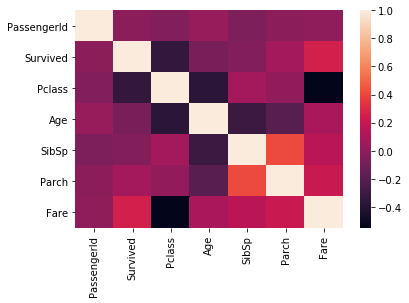

In [11]:
sns.heatmap(train.corr());

In [12]:
train.shape

(891, 12)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


|Variable|	Definition|	Key|
|---      | --: |          |
|**survival**|	Survival|	0 = No, 1 = Yes|
|**pclass**|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|**sex**|	Sex|	|
|**Age**|	Age in years|	|
|**sibsp**|	# of siblings / spouses aboard the Titanic| |	
|**parch**|	# of parents / children aboard the Titanic|	|
|**ticket**|	Ticket number| |	
|**fare**|	Passenger fare| |	
|**cabin**|	Cabin number| |	
|**embarked**|	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [14]:
test['Survived'] = gender_submission['Survived']

In [15]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [16]:
test.shape

(418, 12)

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [18]:
train.drop(['Name','Cabin','Ticket'], axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [19]:
test.drop(['Name','Cabin','Ticket'], axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [20]:
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


In [21]:
numeric_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']
categorical_cols = list(set(train.columns.values.tolist()) - set(numeric_cols))
print(categorical_cols)

['Embarked', 'Sex']


In [22]:
d = {'male' : 0, 'female' : 1}
train['Sex'] = train['Sex'].map(d)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [23]:
d = {'male' : 0, 'female' : 1}
test['Sex'] = test['Sex'].map(d)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,Q,0
1,893,3,1,47.0,1,0,7.0000,S,1
2,894,2,0,62.0,0,0,9.6875,Q,0
3,895,3,0,27.0,0,0,8.6625,S,0
4,896,3,1,22.0,1,1,12.2875,S,1


In [24]:
d = {'C' : 0, 'Q' : 1, 'S' : 2}
train['Embarked'] = train['Embarked'].map(d)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


In [25]:
d = {'C' : 0, 'Q' : 1, 'S' : 2}
test['Embarked'] = test['Embarked'].map(d)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,1,0
1,893,3,1,47.0,1,0,7.0000,2,1
2,894,2,0,62.0,0,0,9.6875,1,0
3,895,3,0,27.0,0,0,8.6625,2,0
4,896,3,1,22.0,1,1,12.2875,2,1


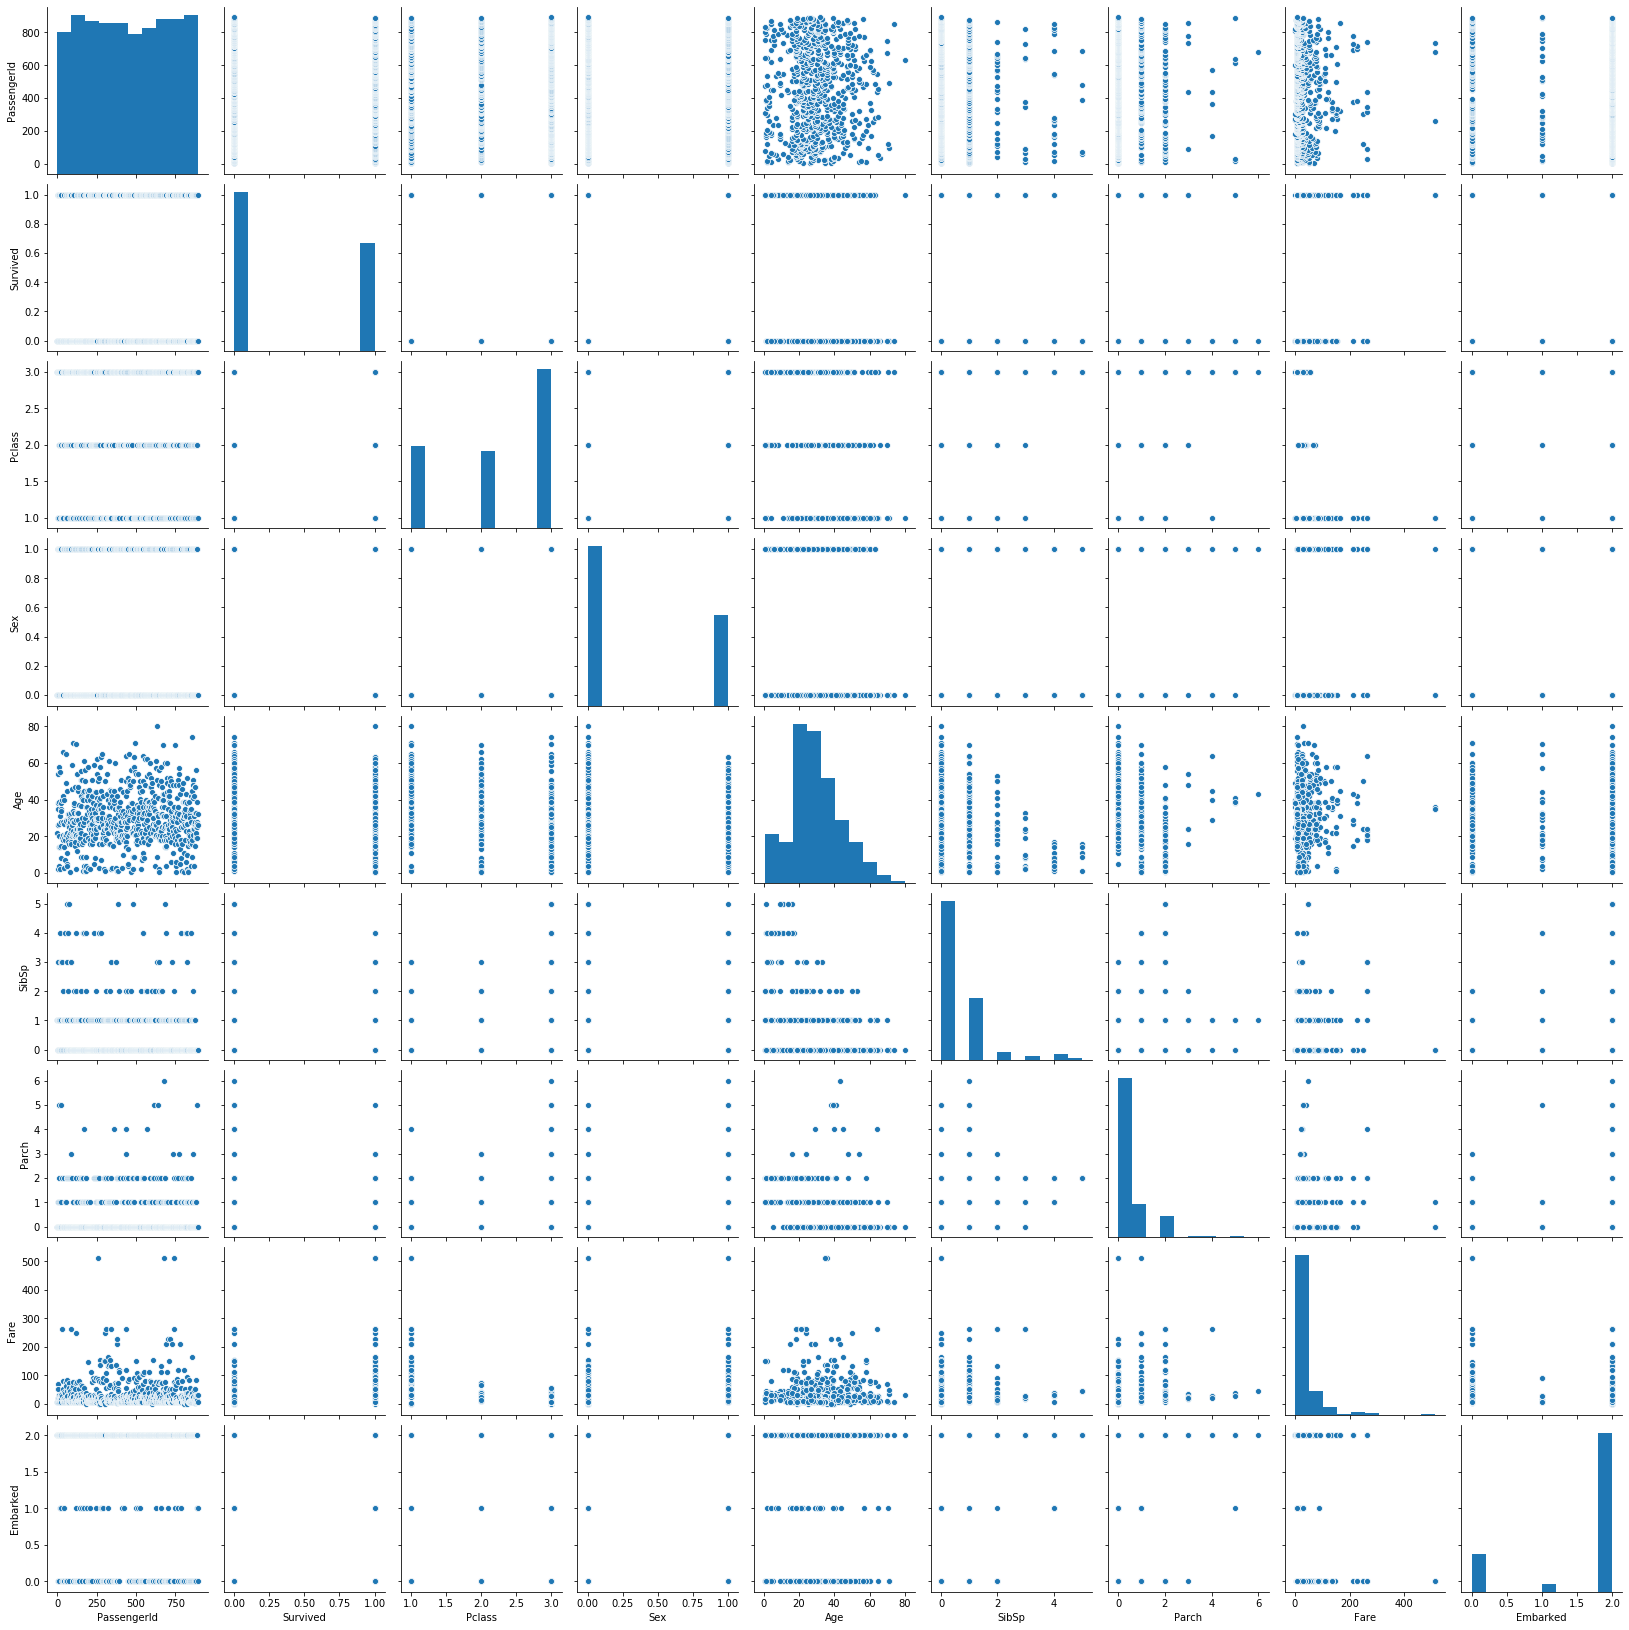

In [26]:
sns.pairplot(train)

In [27]:
train['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

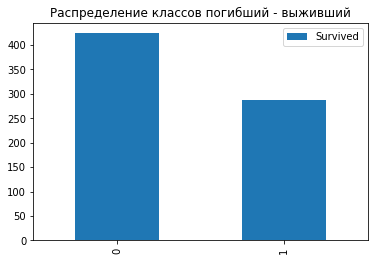

In [28]:
train['Survived'].value_counts().plot(kind='bar', label='Survived')
plt.legend()
plt.title('Распределение классов погибший - выживший');

In [29]:
train_data = train.drop('Survived', axis=1)
train_labels = train['Survived']

In [30]:
test.fillna(0, inplace=True)
test_data = test.drop('Survived', axis=1)
test_labels = test['Survived']

## WaterHat algorithm 

In [31]:
predict_WH = [1] * 418

print("Accuracy score is:", score_ac(test_labels, predict_WH))
print("Precision score is:", score_pr(test_labels, predict_WH))
print("Recall score is:", score_rc(test_labels, predict_WH))

Accuracy score is: 0.36363636363636365
Precision score is: 0.36363636363636365
Recall score is: 1.0


## Модель DecisionTreeClassifier

In [32]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 5, random_state=0)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [33]:
predictions_DTC = clf.predict(test_data)

print("Accuracy score is:", score_ac(test_labels, predictions_DTC))
print("Precision score is:", score_pr(test_labels, predictions_DTC))
print("Recall score is:", score_rc(test_labels, predictions_DTC))

Accuracy score is: 0.7511961722488039
Precision score is: 0.625
Recall score is: 0.7894736842105263


In [34]:
answer_DTC = pd.DataFrame()
answer_DTC['PassengerId'] = gender_submission['PassengerId']
answer_DTC['Survived'] = [int(i) for i in predictions_DTC]
#answer_DTC.head()
#answer_DTC.shape
answer_DTC.to_csv('predictedTitanicDTC.csv', sep=',', header=True, index=False)

#answer_DTC.head()
#!cat predictedTitanicDTC.csv

In [35]:
DTC_scoring = cross_val_score(clf, train_data, train_labels, scoring = scorer_ac, cv = cv_strategy_KFold)

In [36]:
print(DTC_scoring)
print(DTC_scoring.mean())

[0.7972028  0.82517483 0.8028169  0.77464789 0.73943662]
0.7878558061656654


In [37]:
DTC_scoring = cross_val_score(clf, train_data, train_labels, scoring = scorer_pr, cv = cv_strategy_KFold)

In [38]:
print(DTC_scoring)
print(DTC_scoring.mean())

[0.78431373 0.77966102 0.76363636 0.76595745 0.68421053]
0.7555558158400025


In [39]:
DTC_scoring = cross_val_score(clf, train_data, train_labels, scoring = scorer_rc, cv = cv_strategy_KFold)

In [40]:
print(DTC_scoring)
print(DTC_scoring.mean())

[0.68965517 0.79310345 0.73684211 0.63157895 0.67241379]
0.7047186932849365


In [41]:
clf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [42]:
parameters_grid = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
}

In [43]:
grid_cv = GridSearchCV(clf, parameters_grid, scoring = scorer_ac, cv = cv_strategy_KFold)

In [44]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 165 ms


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],

In [45]:
grid_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')

In [46]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8033290653008963
{'criterion': 'entropy', 'splitter': 'random'}


In [47]:
predictions = grid_cv.predict(test_data)
score_ac(test_labels, predictions)

0.6626794258373205

In [48]:
grid_cv = GridSearchCV(clf, parameters_grid, scoring = scorer_pr, cv = cv_strategy_KFold)

In [49]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 531 ms


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],

In [50]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8126363950514894
{'criterion': 'entropy', 'splitter': 'random'}


In [51]:
predictions = grid_cv.predict(test_data)
score_pr(test_labels, predictions)

0.5333333333333333

In [52]:
grid_cv = GridSearchCV(clf, parameters_grid, scoring = scorer_rc, cv = cv_strategy_KFold)

In [53]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 164 ms


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],

In [54]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.7047186932849365
{'criterion': 'gini', 'splitter': 'best'}


In [55]:
predictions = grid_cv.predict(test_data)
score_rc(test_labels, predictions)

0.7894736842105263

In [56]:
clf = tree.DecisionTreeClassifier(criterion ='entropy', splitter = 'random', \
                                  min_samples_leaf = 5, random_state=0)

In [57]:
clf.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')

In [58]:
predictions_DTC1 = clf.predict(test_data)

print("Accuracy score is:", score_ac(test_labels, predictions_DTC1))
print("Precision score is:", score_pr(test_labels, predictions_DTC1))
print("Recall score is:", score_rc(test_labels, predictions_DTC1))

Accuracy score is: 0.6626794258373205
Precision score is: 0.5333333333333333
Recall score is: 0.5789473684210527


In [59]:
answer_DTC1 = pd.DataFrame()
answer_DTC1['PassengerId'] = gender_submission['PassengerId']
answer_DTC1['Survived'] = [int(i) for i in predictions_DTC1]
#answer_DTC1.head()
#answer_DTC1.shape
answer_DTC1.to_csv('predictedTitanicDTC1.csv', sep=',', header=True, index=False)

#answer_DTC1.head()
#!cat predictedTitanicDTC1.csv

## Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [62]:
rf_classifier = RandomForestClassifier(min_samples_leaf=5, random_state=0)

In [63]:
rf_classifier.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [64]:
predictions_RF = rf_classifier.predict(test_data)

print("Accuracy score is:", score_ac(test_labels, predictions_RF))
print("Precision score is:", score_pr(test_labels, predictions_RF))
print("Recall score is:", score_rc(test_labels, predictions_RF))

Accuracy score is: 0.7799043062200957
Precision score is: 0.6666666666666666
Recall score is: 0.7894736842105263


In [65]:
answer_RFC = pd.DataFrame()
answer_RFC['PassengerId'] = gender_submission['PassengerId']
answer_RFC['Survived'] = [int(i) for i in predictions_RF]
#answer_RFC.head()
#answer_RFC.shape
answer_RFC.to_csv('predictedTitanicRFC.csv', sep=',', header=True, index=False)

#answer_RFC.head()
#!cat predictedTitanicRFC.csv

In [66]:
n_trees = [1] + [i for i in range(10, 105, 5)] 

In [67]:
%%time
scoring = []
for n_tree in n_trees:
    estimator = RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=0)
    score = cross_val_score(estimator, train_data, train_labels, scoring = 'accuracy', cv = 3)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

Wall time: 4.77 s


In [68]:
scoring

matrix([[0.68907563, 0.73839662, 0.80590717],
        [0.74789916, 0.7721519 , 0.80590717],
        [0.77310924, 0.78481013, 0.80168776],
        [0.77310924, 0.78059072, 0.82278481],
        [0.77731092, 0.77637131, 0.82278481],
        [0.77731092, 0.78902954, 0.83122363],
        [0.76890756, 0.78481013, 0.8185654 ],
        [0.7394958 , 0.79324895, 0.82278481],
        [0.7394958 , 0.78481013, 0.82278481],
        [0.7394958 , 0.78059072, 0.82700422],
        [0.73109244, 0.78902954, 0.81434599],
        [0.72689076, 0.78059072, 0.81012658],
        [0.72689076, 0.78902954, 0.81434599],
        [0.73109244, 0.78902954, 0.8185654 ],
        [0.72689076, 0.78059072, 0.8185654 ],
        [0.71428571, 0.76793249, 0.8185654 ],
        [0.70588235, 0.76793249, 0.82278481],
        [0.70588235, 0.78481013, 0.82700422],
        [0.70588235, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422]])

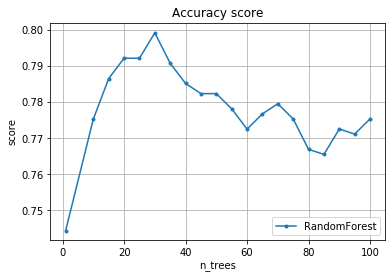

In [69]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [70]:
rf_classifier.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [71]:
parameters_grid = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [50, 80, 100, 130],
}

In [72]:
grid_cv = GridSearchCV(rf_classifier, parameters_grid, scoring = scorer_ac, cv = cv_strategy_KFold)

In [73]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 5.45 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                             

In [74]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8187924751305033
{'criterion': 'gini', 'n_estimators': 100}


In [75]:
predictions = grid_cv.predict(test_data)
score_ac(test_labels, predictions)

0.7799043062200957

In [76]:
grid_cv = GridSearchCV(rf_classifier, parameters_grid, scoring = scorer_pr, cv = cv_strategy_KFold)

In [77]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 5.51 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                             

In [78]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8375503469228474
{'criterion': 'gini', 'n_estimators': 100}


In [79]:
predictions = grid_cv.predict(test_data)
score_pr(test_labels, predictions)

0.6666666666666666

In [80]:
grid_cv = GridSearchCV(rf_classifier, parameters_grid, scoring = scorer_rc, cv = cv_strategy_KFold)

In [81]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 5.53 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                             

In [82]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.6874773139745917
{'criterion': 'gini', 'n_estimators': 100}


In [83]:
predictions = grid_cv.predict(test_data)
score_rc(test_labels, predictions)

0.7894736842105263

## XGBoost

In [84]:
import xgboost as xgb

In [85]:
%%time
xgb_scoring = []
for n_tree in n_trees:
    estimator_XGB = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3, random_state = 0)
    score = cross_val_score(estimator, train_data, train_labels, scoring = 'accuracy', cv = 3)    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

Wall time: 9.63 s


In [86]:
xgb_scoring

matrix([[0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422]])

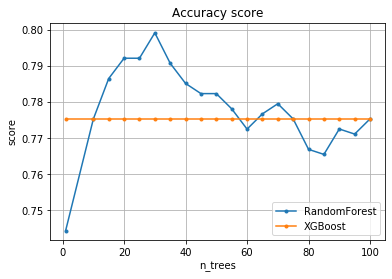

In [87]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [88]:
estimator_XGB = xgb.XGBClassifier(learning_rate=0.1, min_samples_leaf=5, random_state = 0)

In [89]:
estimator_XGB.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, min_samples_leaf=5, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [90]:
predictions_XGB = estimator_XGB.predict(test_data)

print("Accuracy score is:", score_ac(test_labels, predictions_XGB))
print("Precision score is:", score_pr(test_labels, predictions_XGB))
print("Recall score is:", score_rc(test_labels, predictions_XGB))

Accuracy score is: 0.7105263157894737
Precision score is: 0.5778894472361809
Recall score is: 0.756578947368421


In [91]:
answer_XGB = pd.DataFrame()
answer_XGB['PassengerId'] = gender_submission['PassengerId']
answer_XGB['Survived'] = [int(i) for i in predictions_XGB]
#answer_XGB.head()
#answer_XGB.shape
answer_XGB.to_csv('predictedTitanicXGB.csv', sep=',', header=True, index=False)

#answer_XGB.head()
#!cat predictedTitanicXGB.csv

In [92]:
estimator_XGB.get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity', 'min_samples_leaf'])

In [93]:
parameters_grid = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [50, 80, 100, 130],
    
}

In [94]:
grid_cv = GridSearchCV(estimator_XGB, parameters_grid, scoring = scorer_ac, cv = cv_strategy_KFold)

In [95]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 1.35 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     min_samples_leaf=5, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'ent

In [96]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8103516202107752
{'criterion': 'gini', 'n_estimators': 100}


In [97]:
predictions = grid_cv.predict(test_data)
score_ac(test_labels, predictions)

0.7105263157894737

In [98]:
estimator_XGB = xgb.XGBClassifier(n_estimators=100, min_samples_leaf=5, random_state = 0)

In [99]:
parameters_grid = {
    'criterion' : ['gini', 'entropy'],
    'learning_rate' : [0.01, 0.1, 0.2],
    
}

In [100]:
grid_cv = GridSearchCV(estimator_XGB, parameters_grid, scoring = scorer_ac, cv = cv_strategy_KFold)

In [101]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 980 ms


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     min_samples_leaf=5, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'ent

In [102]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8103516202107752
{'criterion': 'gini', 'learning_rate': 0.1}


In [103]:
predictions = grid_cv.predict(test_data)
score_ac(test_labels, predictions)

0.7105263157894737

In [104]:
estimator_XGB1 = xgb.XGBClassifier(criterion='gini', learning_rate=0.1, min_samples_leaf=5, random_state = 0)

In [105]:
estimator_XGB1.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, min_samples_leaf=5, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [107]:
predictions_XGB1 = estimator_XGB1.predict(test_data)

print("Accuracy score is:", score_ac(test_labels, predictions_XGB1))
print("Precision score is:", score_pr(test_labels, predictions_XGB1))
print("Recall score is:", score_rc(test_labels, predictions_XGB1))

Accuracy score is: 0.7105263157894737
Precision score is: 0.5778894472361809
Recall score is: 0.756578947368421


In [108]:
answer_XGB1 = pd.DataFrame()
answer_XGB1['PassengerId'] = gender_submission['PassengerId']
answer_XGB1['Survived'] = [int(i) for i in predictions_XGB1]
#answer_XGB1.head()
#answer_XGB1.shape
answer_XGB1.to_csv('predictedTitanicXGB1.csv', sep=',', header=True, index=False)

#answer_XGB1.head()
#!cat predictedTitanicXGB1.csv

## CatBoost

In [109]:
from catboost import CatBoostClassifier

In [110]:
model = CatBoostClassifier(iterations=2, depth=2, learning_rate=1, \
                           loss_function='Logloss', verbose=True, random_state = 10)

In [111]:
# train the model
model.fit(train_data, train_labels)

# make the prediction using the resulting model
predictions_CAT = model.predict(test_data)
preds_proba = model.predict_proba(test_data)

#print("class = ", preds_class)
#print("proba = ", preds_proba)

0:	learn: 0.5099252	total: 182ms	remaining: 182ms
1:	learn: 0.4605179	total: 187ms	remaining: 0us


In [112]:
print("Accuracy score is:", score_ac(test_labels, predictions_CAT))
print("Precision score is:", score_pr(test_labels, predictions_CAT))
print("Recall score is:", score_rc(test_labels, predictions_CAT))

Accuracy score is: 0.8971291866028708
Precision score is: 0.8978102189781022
Recall score is: 0.8092105263157895


In [113]:
answer_CAT = pd.DataFrame()
answer_CAT['PassengerId'] = gender_submission['PassengerId']
answer_CAT['Survived'] = [int(i) for i in predictions_CAT]
#answer_CAT.head()
#answer_CAT.shape
answer_CAT.to_csv('predictedTitanicCAT.csv', sep=',', header=True, index=False)

#answer_CAT.head()
#!cat predictedTitanicCAT.csv